# problem1

In [190]:
# requirements
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(777)

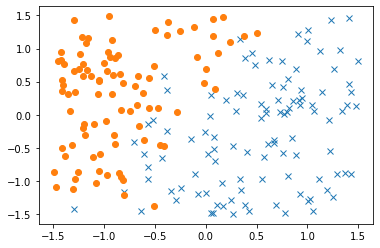

In [191]:
# dataset 4
n = 200
x_d4 = 3 * (np.random.rand(n, 4) - 0.5)
y_d4 = (2 * x_d4[:, 0] - 1 * x_d4[:,1] + 0.5 + 0.5 * np.random.randn(n)) > 0
y_d4 = 2 * y_d4 -1

plt.plot(np.extract(y_d4==1,x_d4[:,0]),np.extract(y_d4==1,x_d4[:,1]), 'x')
plt.plot(np.extract(y_d4==-1,x_d4[:,0]),np.extract(y_d4==-1,x_d4[:,1]), 'o')

1. steepest gradient method

In [192]:
loss_hist_batch = [] # to store the history of loss J(w_t)

# implement batch steepest gradient method here

num_iter = 300
X = np.concatenate((x_d4[:,:2], np.ones((n,1))), axis=1)
y = y_d4
ww_batch = np.random.randn(3)
lam = 0.01
alpha_base = 1
lip = 0.25 * np.max(X**2, axis=0)
eta = 1/n * np.max(np.linalg.eig(X.T @ X)[0]) + 2 * lam

for t in range(1,num_iter+1):
    ywx = y * (X @ ww_batch)
    posterior = 1 / (1 + np.exp(-1 * ywx))

    grad_sum = 1/n * X.T @ ((1 - posterior) * (-y))
    grad = grad_sum + 2 * lam * ww_batch

    loss_batch = 1/n  * np.sum(np.log(1 + np.exp(-1 * ywx))) + lam * (ww_batch.T @ ww_batch)
    loss_hist_batch.append(loss_batch)

    direction = -1 * grad
    #alpha = alpha_base / np.sqrt(t) / lip
    alpha = eta
    ww_batch = ww_batch + alpha * direction

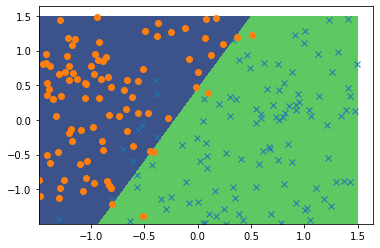

In [193]:
# plot boundary for binary classification

def plot_bi (x1, x2, y, w):
    delta = 0.01
    xa = np.arange(np.min(x1), np.max(x1), delta)
    ya = np.arange(np.min(x2), np.max(x2), delta)
    xm, ym = np.meshgrid(xa, ya)

    z = xm * w[0] + ym * w[1] + w[2]

    plt.plot(np.extract(y==1,x1),np.extract(y==1,x2), 'x')
    plt.plot(np.extract(y==-1,x1),np.extract(y==-1,x2), 'o')

    plt.contourf(xm, ym, z, 0)


plot_bi(x_d4[:,0], x_d4[:,1], y_d4, ww_batch)

2. newton method

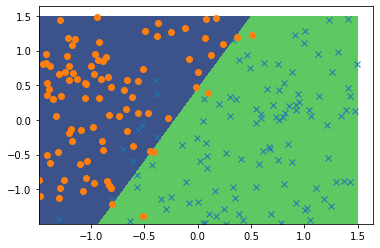

In [194]:
loss_hist_newton = [] # to store the history of loss J(w_t)

# implement Newton based method here

num_iter = 300
X = np.concatenate((x_d4[:,:2], np.ones((n,1))), axis=1)
y = y_d4
ww_newton = np.random.randn(3)
lam = 0.01
alpha_base = 1

# solver
def mldivide(A, b):
    piA = np.linalg.pinv(A)
    x = np.dot(piA, b)
    return x

for t in range(1,num_iter+1):
    ywx = y * (X @ ww_newton)
    posterior = 1 / (1 + np.exp(-1 * ywx))

    grad_sum = 1/n * X.T @ ((1 - posterior) * (-y))
    grad = grad_sum + 2 * lam * ww_newton

    hess_sum = 1/n * (X.T @ np.diag(posterior * (1-posterior)) @ X)
    hess = hess_sum + 2 * lam * np.eye(ww_newton.shape[0])

    loss_newton = 1/n  * np.sum(np.log(1 + np.exp(-1 * ywx))) + lam * (ww_newton.T @ ww_newton)
    loss_hist_newton.append(loss_newton)

    direction = -1 * mldivide(hess, grad)
    alpha = alpha_base / np.sqrt(t+10)
    #alpha = 1
    ww_newton = ww_newton + alpha * direction

plot_bi(x_d4[:,0], x_d4[:,1], y_d4, ww_newton)

Text(0, 0.5, 'loss')

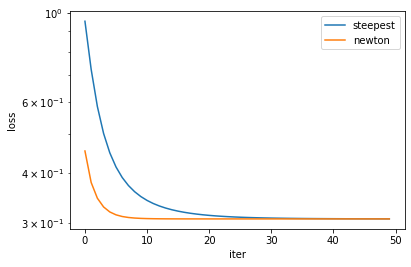

In [195]:
show_iter = 50

# plot the result
plt.plot(loss_hist_batch[:show_iter], label='steepest')
plt.plot(loss_hist_newton[:show_iter], label='newton')
plt.legend()
plt.yscale('log')
plt.xlabel('iter')
plt.ylabel('loss')


3. compare the performance

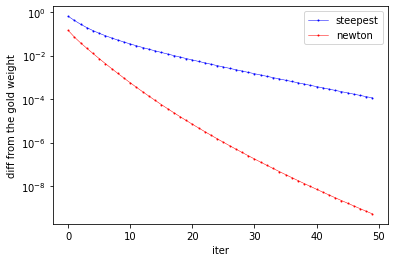

In [196]:
show_iter = 50
min_ll = min(min(loss_hist_batch), min(loss_hist_newton))

fig = plt.figure()

plt.plot(np.abs(loss_hist_batch[:show_iter] - min_ll), 'bo-', linewidth=0.5, markersize=1, label='steepest')
plt.plot(np.abs(loss_hist_newton[:show_iter] - min_ll), 'ro-', linewidth=0.5, markersize=1, label='newton')
plt.legend()
plt.yscale('log')
plt.xlabel('iter')
plt.ylabel('diff from the gold weight')


fig.savefig("fig/binary_performance.png")

4. multiclass classification

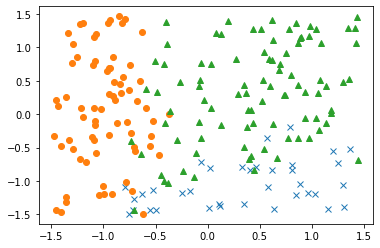

In [197]:
# dataset 5
n = 200
x_d5 = 3 * (np.random.rand(n, 4) - 0.5)
W = np.array([[ 2,  -1, 0.5,],
              [-3,   2,   1,],
              [ 1,   2,   3]])
y_d5 = np.argmax(np.dot(np.hstack([x_d5[:,:2], np.ones((n, 1))]), W.T)
                        + 0.5 * np.random.randn(n, 3), axis=1)

plt.plot(np.extract(y_d5==0,x_d5[:,0]),np.extract(y_d5==0,x_d5[:,1]), 'x')
plt.plot(np.extract(y_d5==1,x_d5[:,0]),np.extract(y_d5==1,x_d5[:,1]), 'o')
plt.plot(np.extract(y_d5==2,x_d5[:,0]),np.extract(y_d5==2,x_d5[:,1]), '^')

4.1. steepest gradient method

In [198]:
loss_hist_batch = [] # to store the history of loss J(w_t)

# implement batch steepest gradient method here

num_iter = 300
X = np.concatenate((x_d5[:,:2], np.ones((n,1))), axis=1)
y = y_d5
ww_batch = np.random.randn(3, 3)
lam = 0.01
alpha_base = 1
lip = 0.25 * np.max(X**2, axis=0)
eta = 1/n * np.max(np.linalg.eig(X.T @ X)[0]) + 2 * lam

for t in range(1,num_iter+1):
    wcx = X @ ww_batch.T
    onehot = np.identity(ww_batch.shape[0])[y]

    wyx = np.sum(ww_batch[y, :] * X, axis=1)
    max_wcx = np.max(wcx, axis=1)
    # loss_batch = 1/n  * np.sum(-1 * wyx + max_wcx) + lam * np.sum(ww_batch * ww_batch)
    loss_batch = 1/n  * np.sum(-1 * wyx + np.log(np.sum(np.exp(wcx), axis=1))) + lam * np.sum(ww_batch * ww_batch)
    loss_hist_batch.append(loss_batch)

    for c in range(0, ww_batch.shape[0]) :
        pkx = np.exp(wcx[:,c]) / np.sum(np.exp(wcx), axis=1)
        grad_sum = 1/n * X.T @ (pkx - onehot[:, c])
        grad = grad_sum + 2 * lam * ww_batch[c]

        direction = -1 * grad
        #alpha = alpha_base / np.sqrt(t) / lip
        alpha = eta
        ww_batch[c] = ww_batch[c] + alpha * direction


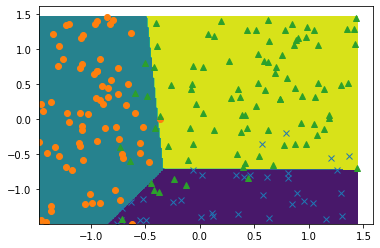

In [199]:
# plot boundary for multi classification

def plot_mul (x1, x2, y, w):
    delta = 0.01
    xa = np.arange(np.min(x1), np.max(x1), delta)
    ya = np.arange(np.min(x2), np.max(x2), delta)
    xm, ym = np.meshgrid(xa, ya)

    xm1 = np.expand_dims(xm, axis=2)
    ym1 = np.expand_dims(ym, axis=2)
    X = np.concatenate((xm1, ym1, np.ones(xm1.shape)), axis=2)
    z = X @ w.T

    plt.plot(np.extract(y==0,x1),np.extract(y==0,x2), 'x')
    plt.plot(np.extract(y==1,x1),np.extract(y==1,x2), 'o')
    plt.plot(np.extract(y==2,x1),np.extract(y==2,x2), '^')

    plt.contourf(xm, ym, np.argmax(z, axis=2))

plot_mul(x_d5[:,0], x_d5[:,1], y_d5, ww_batch)

4.2. newton method

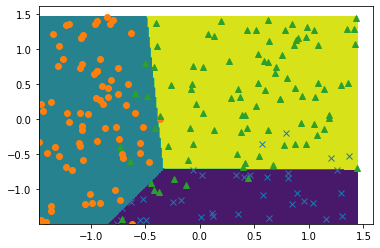

In [200]:
loss_hist_newton = [] # to store the history of loss J(w_t)

# implement batch steepest gradient method here

num_iter = 300
X = np.concatenate((x_d5[:,:2], np.ones((n,1))), axis=1)
y = y_d5
ww_newton = np.random.randn(3, 3)
lam = 0.01
alpha_base = 1

# solver
def mldivide(A, b):
    piA = np.linalg.pinv(A)
    x = np.dot(piA, b)
    return x

for t in range(1,num_iter+1):
    wcx = X @ ww_newton.T
    onehot = np.identity(ww_newton.shape[0])[y]

    wyx = np.sum(ww_newton[y, :] * X, axis=1)
    max_wcx = np.max(wcx, axis=1)
    # loss_newton = 1/n  * np.sum(-1 * wyx + max_wcx) + lam * np.sum(ww_newton * ww_newton)
    loss_newton = 1/n  * np.sum(-1 * wyx + np.log(np.sum(np.exp(wcx), axis=1))) + lam * np.sum(ww_newton * ww_newton)
    loss_hist_newton.append(loss_newton)

    for c in range(0, ww_newton.shape[0]) :
        pkx = np.exp(wcx[:,c]) / np.sum(np.exp(wcx), axis=1)
        grad_sum = 1/n * X.T @ (pkx - onehot[:, c])
        grad = grad_sum + 2 * lam * ww_newton[c]

        Wk = np.diag(pkx * (1-pkx))
        hess_sum = 1/n * X.T @ Wk @ X
        hess = hess_sum + 2 * lam * np.eye(ww_newton.shape[0])

        direction = -1 * mldivide(hess, grad)
        alpha = alpha_base / np.sqrt(t+10)
        #alpha = 1
        ww_newton[c] = ww_newton[c] + alpha * direction

plot_mul(x_d5[:,0], x_d5[:,1], y_d5, ww_newton)


Text(0, 0.5, 'loss')

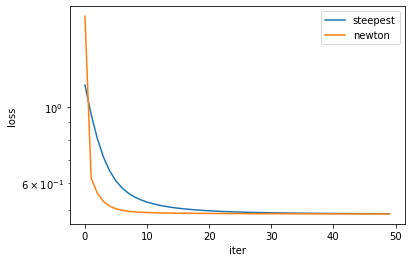

In [201]:
show_iter = 50

# plot the result
plt.plot(loss_hist_batch[:show_iter], label='steepest')
plt.plot(loss_hist_newton[:show_iter], label='newton')
plt.legend()
plt.yscale('log')
plt.xlabel('iter')
plt.ylabel('loss')

4.3. compare the performance

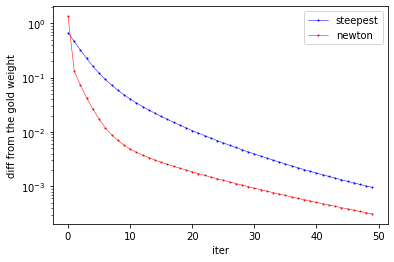

In [202]:
show_iter = 50
min_ll = min(min(loss_hist_batch), min(loss_hist_newton))

fig = plt.figure()

plt.plot(np.abs(loss_hist_batch[:show_iter] - min_ll), 'bo-', linewidth=0.5, markersize=1, label='steepest')
plt.plot(np.abs(loss_hist_newton[:show_iter] - min_ll), 'ro-', linewidth=0.5, markersize=1, label='newton')
plt.legend()
plt.yscale('log')
plt.xlabel('iter')
plt.ylabel('diff from the gold weight')

fig.savefig("fig/multi_performance.png")